##  INFOSYS STOCK MARKETING PRICE PREDICTION FROM [01-07-2015 to 01-07-2020(5 Years)]
### DATASET FROM NSE India (National Stock Exchange of India Ltd)
### Support_Vector_Machine

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns


In [3]:
INFOSYS= pd.read_csv("INFY.NS.csv")
INFOSYS = INFOSYS.dropna()
INFOSYS = INFOSYS[['Date','Open', 'High', 'Low','Close','Adj Close','Volume']]
INFOSYS.head()

Date   Open        High         Low       Close   Adj Close  \
0  2015-07-01  494.5  502.500000  493.000000  498.700012  415.561249   
1  2015-07-02  499.5  500.700012  492.524994  494.000000  411.644745   
2  2015-07-03  494.0  496.500000  491.000000  495.149994  412.603058   
3  2015-07-06  492.5  494.000000  487.500000  491.649994  409.686493   
4  2015-07-07  492.5  495.000000  489.500000  490.250000  408.519897   

      Volume  
0  6880852.0  
1  4007568.0  
2  2695306.0  
3  4305602.0  
4  3497418.0

In [4]:
INFOSYS.describe()

Open         High          Low        Close    Adj Close  \
count  1227.000000  1227.000000  1227.000000  1227.000000  1227.000000   
mean    605.359984   611.994194   598.518723   605.161715   557.417386   
std     103.981567   105.130168   103.068678   104.111674   118.345056   
min     440.000000   443.799988   430.000000   436.700012   390.604187   
25%     514.187500   519.762482   509.349991   513.974976   451.269745   
50%     586.025024   592.450012   580.000000   585.950012   517.107422   
75%     704.924988   711.725006   695.975006   704.262512   676.590088   
max     843.299988   847.000000   835.049988   840.150024   810.035217   

             Volume  
count  1.227000e+03  
mean   8.675740e+06  
std    7.941786e+06  
min    7.589560e+05  
25%    5.361510e+06  
50%    7.023516e+06  
75%    9.551616e+06  
max    1.644050e+08

In [5]:
INFOSYS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1227 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 76.7+ KB


In [6]:
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [7]:
layout = go.Layout(
    title='STOCK PRICE OF INFOSYS',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
INFOSYS_DATA = [{'x':INFOSYS['Date'], 'y':INFOSYS['Close']}]
plot = go.Figure(data=INFOSYS_DATA, layout=layout)
#INFOSYS_DATA.describe()

'\n!pip install opencv\nimport cv2\ncv2.imshow(plot)\n#sns.countplot(INFOSYS_DATA)\n'

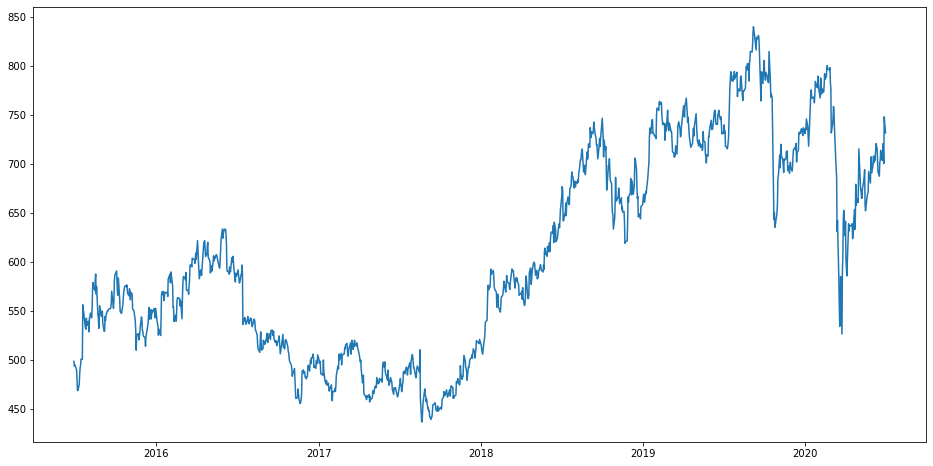

In [8]:
#iplot(plot)
import matplotlib.pyplot as plt
INFOSYS['Date'] = pd.to_datetime(INFOSYS.Date,format='%Y-%m-%d')
INFOSYS.index = INFOSYS['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(INFOSYS['Close'], label='Close Price history')
#plt.figure(figsize=(16,8))
#plt.plot(df['Close'], label='Close Price history')
'''
!pip install opencv
import cv2
cv2.imshow(plot)
#sns.countplot(INFOSYS_DATA)
'''

In [9]:
INFOSYS['Date'] = pd.to_datetime(INFOSYS.Date,format='%Y-%m-%d')
INFOSYS.index = INFOSYS['Date']

In [10]:
data = INFOSYS.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(INFOSYS)),columns=['Date', 'Close'])

In [11]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [12]:
train = new_data[:987]
valid = new_data[987:]

In [13]:
print('Shape of training set:')
print(train.shape)

Shape of training set:
(987, 2)


In [14]:
print('Shape of validation set:')
print(valid.shape)

Shape of validation set:
(240, 2)


In [15]:
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [16]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
65.34357883500857


In [17]:



plt.figure(figsize=(16,8))
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [18]:
INFOSYS['Open-Close']= INFOSYS.Close - INFOSYS.Open
INFOSYS['High-Low']  = INFOSYS.High - INFOSYS.Low
INFOSYS = INFOSYS.dropna()
X= INFOSYS[['Open-Close', 'High-Low']]
X.head()

Open-Close  High-Low
Date                            
2015-07-01    4.200012  9.500000
2015-07-02   -5.500000  8.175018
2015-07-03    1.149994  5.500000
2015-07-06   -0.850006  6.500000
2015-07-07   -2.250000  5.500000

In [19]:
Y= np.where(INFOSYS['Adj Close'].shift(-1)>INFOSYS['Adj Close'],1,-1)

In [20]:
split_percentage = 0.8
split = int(split_percentage*len(INFOSYS))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [21]:
from sklearn import metrics
from sklearn.svm import SVC
%pylab inline
%matplotlib inline

from sklearn import svm

model = svm.SVC(kernel ='linear',C=1.00)
model.fit(X_train, Y_train)
print(model)

accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test = accuracy_score(Y_test, model.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Populating the interactive namespace from numpy and matplotlib
SVC(kernel='linear')
Train_data Accuracy: 0.52
Test_data Accuracy: 0.52


In [22]:
model.score(X_train, Y_train)

0.5208970438328236

In [23]:
predicted = model.predict(X_test)

In [24]:
from sklearn import metrics

In [25]:
print(metrics.confusion_matrix(Y_test, predicted))

[[ 18  98]
 [ 20 110]]


In [26]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.47      0.16      0.23       116
           1       0.53      0.85      0.65       130

    accuracy                           0.52       246
   macro avg       0.50      0.50      0.44       246
weighted avg       0.50      0.52      0.45       246



In [27]:
print(model.score(X_train,Y_train))

0.5208970438328236


### ACCURACY OF TRAINING MODEL FOR INFOSYS STOCK MARKET PRICE PREDICTION IS ABOUT 52%.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [29]:
pipe_line = Pipeline([('clf', SVC())])

In [30]:
pipe_line.fit(X_train, Y_train)

Pipeline(steps=[('clf', SVC())])

In [31]:
pipe_line.score(X_train, Y_train)

0.5331294597349643

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
score = cross_val_score(estimator=pipe_line, X=X, y=Y, cv=10)

In [34]:
print('cv accuracy score : %s' % score)
print('cv accuracy : %.3f +/- %.3f' % (np.mean(score), np.std(score)))

cv accuracy score : [0.51219512 0.45528455 0.51219512 0.48780488 0.43089431 0.50406504
 0.5203252  0.51639344 0.46721311 0.42622951]
cv accuracy : 0.483 +/- 0.034
